# Flavio examples: plots of $q^2$-dependent observables

When dealing with $q^2$-dependent observables, like differential branching ratios or angular observables, flavio can produce three different kinds of plots:

- the differential, i.e. smooth, theory prediction (via `flavio.plots.q2_plot_th_ff`)
- binned experimental measurements (via `flavio.plots.q2_plot_exp`)
- the binned theory prediction (via `flavio.plots.q2_plot_th_bin`)

This notebook illustrates the usage of these functions. For details, see the [API docs](https://flav-io.github.io/apidoc/flavio/plots/plotfunctions.m.html).

For illustration, we will focus on the branching ratio of the $B^+\to K^+l^+l^-$ decay.

## Preliminaries

In [1]:
import flavio
import flavio.plots
flavio.__version__

'0.13'

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("savefig", dpi=100) # to get pretty high-res plots

## Differential theory prediction

As simple as:

/home/egede/Git/flavio/flavio/physics/bdecays/bpll.py:73: UserWarning: The predictions in the region of narrow charmonium resonances are not meaningful
  warnings.warn("The predictions in the region of narrow charmonium resonances are not meaningful")
/home/egede/Git/flavio/flavio/physics/bdecays/bpll.py:84: UserWarning: The predictions in the region of narrow charmonium resonances are not meaningful
  warnings.warn("The predictions in the region of narrow charmonium resonances are not meaningful")


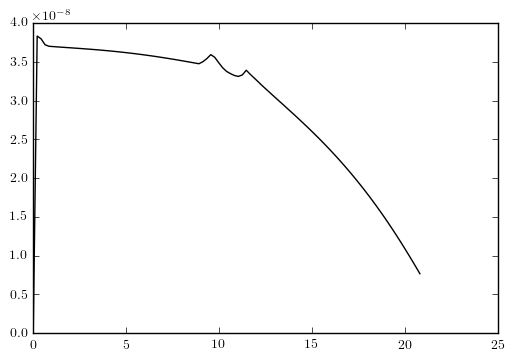

In [10]:
flavio.plots.q2_plot_th_diff('dBR/dq2(B+->Kmumu)', q2min=0, q2max=21)

Note the discontinuity at $q^2$ close to 0. This can be avoided by increasing the number of $q^2$ steps from the default (100):

/home/egede/Git/flavio/flavio/physics/bdecays/bpll.py:73: UserWarning: The predictions in the region of narrow charmonium resonances are not meaningful
  warnings.warn("The predictions in the region of narrow charmonium resonances are not meaningful")
/home/egede/Git/flavio/flavio/physics/bdecays/bpll.py:84: UserWarning: The predictions in the region of narrow charmonium resonances are not meaningful
  warnings.warn("The predictions in the region of narrow charmonium resonances are not meaningful")


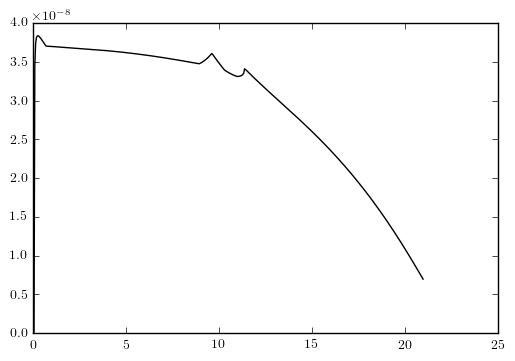

In [11]:
flavio.plots.q2_plot_th_diff('dBR/dq2(B+->Kmumu)', q2min=0, q2max=21, q2steps=500)

Try to look at the muon and electron mode separately.

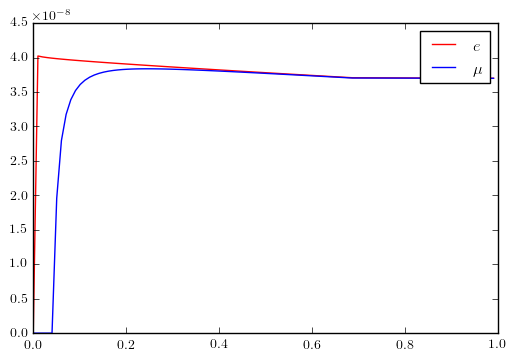

In [50]:
flavio.plots.q2_plot_th_diff('dBR/dq2(B+->Kee)', q2min=0, q2max=1.0, c='r', label=r'$e$')
flavio.plots.q2_plot_th_diff('dBR/dq2(B+->Kmumu)', q2min=0, q2max=1.0, c='b', label=r'$\mu$')
plt.legend();

This plot also demonstrates how easy it is to add a plot legend: just use the `label` keyword argument on the plot functions and add `plt.legend()` at the end. More generally, all additional keyword arguments added to the polot functions will be passed on to the actual `matplotlib` functions (`pyplot.plot`, in this case).

### New physics

New physics can be added easily by supplying a `WilsonCoefficients` instance. Here we list all of them!

In [45]:
wc_np = flavio.WilsonCoefficients()
print(wc_np.all_wc)

['C9_bdmue', 'C10_bdmue', 'C9p_bdmue', 'C10p_bdmue', 'CS_bdmue', 'CP_bdmue', 'CSp_bdmue', 'CPp_bdmue', 'CL_sdnumunue', 'CR_sdnumunue', 'C9_bdmutau', 'C10_bdmutau', 'C9p_bdmutau', 'C10p_bdmutau', 'CS_bdmutau', 'CP_bdmutau', 'CSp_bdmutau', 'CPp_bdmutau', 'CL_bdnumunue', 'CR_bdnumunue', 'C9_sdtaumu', 'C10_sdtaumu', 'C9p_sdtaumu', 'C10p_sdtaumu', 'CS_sdtaumu', 'CP_sdtaumu', 'CSp_sdtaumu', 'CPp_sdtaumu', 'CV_sctaunu', 'CS_sctaunu', 'CT_sctaunu', 'CVp_sctaunu', 'CSp_sctaunu', 'CV_sutaunu', 'CS_sutaunu', 'CT_sutaunu', 'CVp_sutaunu', 'CSp_sutaunu', 'C9_sdmutau', 'C10_sdmutau', 'C9p_sdmutau', 'C10p_sdmutau', 'CS_sdmutau', 'CP_sdmutau', 'CSp_sdmutau', 'CPp_sdmutau', 'CL_bsnuenumu', 'CR_bsnuenumu', 'CV_duenu', 'CS_duenu', 'CT_duenu', 'CVp_duenu', 'CSp_duenu', 'CL_bsnutaunumu', 'CR_bsnutaunumu', 'C1_bd', 'C2_bd', 'C3_bd', 'C4_bd', 'C5_bd', 'C6_bd', 'C7eff_bd', 'C8eff_bd', 'C9_bdee', 'C10_bdee', 'C3Q_bd', 'C4Q_bd', 'C5Q_bd', 'C6Q_bd', 'Cb_bd', 'C1p_bd', 'C2p_bd', 'C3p_bd', 'C4p_bd', 'C5p_bd', 'C6p_

Try to add a new physics component to $C_9$.

/home/egede/Git/flavio/flavio/physics/bdecays/bpll.py:73: UserWarning: The predictions in the region of narrow charmonium resonances are not meaningful
  warnings.warn("The predictions in the region of narrow charmonium resonances are not meaningful")
/home/egede/Git/flavio/flavio/physics/bdecays/bpll.py:84: UserWarning: The predictions in the region of narrow charmonium resonances are not meaningful
  warnings.warn("The predictions in the region of narrow charmonium resonances are not meaningful")


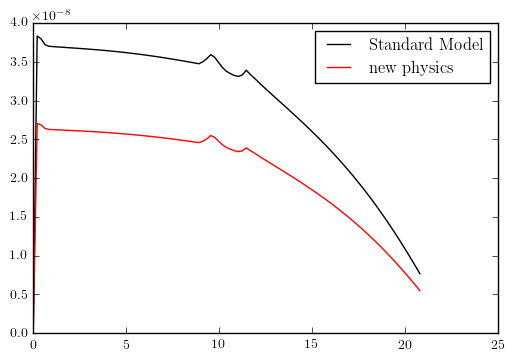

In [51]:
wc_np.set_initial({'C9_bsmumu': -1.5}, scale=160 )
flavio.plots.q2_plot_th_diff('dBR/dq2(B+->Kmumu)', q2min=0, q2max=21, label='Standard Model')
flavio.plots.q2_plot_th_diff('dBR/dq2(B+->Kmumu)', q2min=0, q2max=21, wc=wc_np, label='new physics', c='r')
plt.legend();

## Experimental measurements

The measuremens defined in `measurements.yaml` can be used to automatically plot data points. The labels for the legend are set automatically.

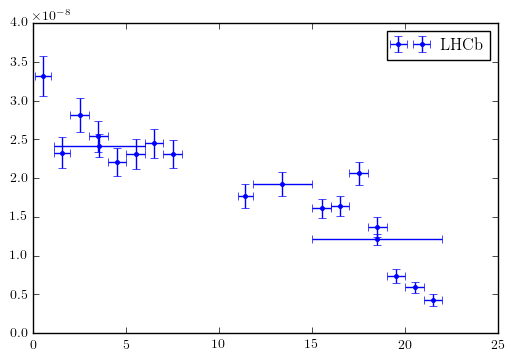

In [37]:
flavio.plots.q2_plot_exp('<dBR/dq2>(B+->Kmumu)')
plt.legend()

Now try to plot theory on top of the experimental data

/home/egede/Git/flavio/flavio/physics/bdecays/bpll.py:73: UserWarning: The predictions in the region of narrow charmonium resonances are not meaningful
  warnings.warn("The predictions in the region of narrow charmonium resonances are not meaningful")
/home/egede/Git/flavio/flavio/physics/bdecays/bpll.py:84: UserWarning: The predictions in the region of narrow charmonium resonances are not meaningful
  warnings.warn("The predictions in the region of narrow charmonium resonances are not meaningful")


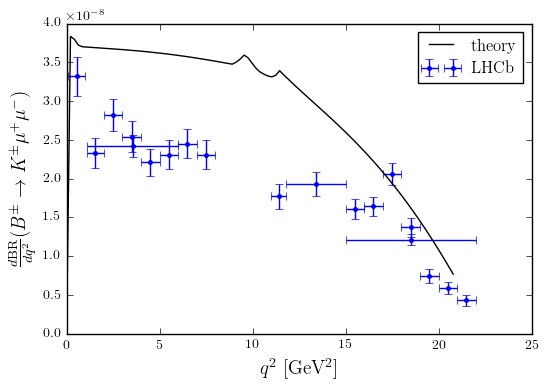

In [52]:
flavio.plots.q2_plot_exp('<dBR/dq2>(B+->Kmumu)')
flavio.plots.q2_plot_th_diff('dBR/dq2(B+->Kmumu)', 0, 21, label='theory')

plt.xlabel(r'$q^2$ [GeV$^2$]')
plt.ylabel(flavio.Observable.get_instance('dBR/dq2(B+->Kmumu)').tex)
plt.legend()

The above plot also demonstrates the use of $\LaTeX$ in axis labels. For the y axis, we have even been to lazy to type the name of the observable, but simple used the `tex` attribute of the `Observable` object that is already predefined in flavio.

## Binned theory prediction

Try to see if you can change the plot below to compare the binned theory to the data in $B+ \to K^+ \mu^+\mu^-$.

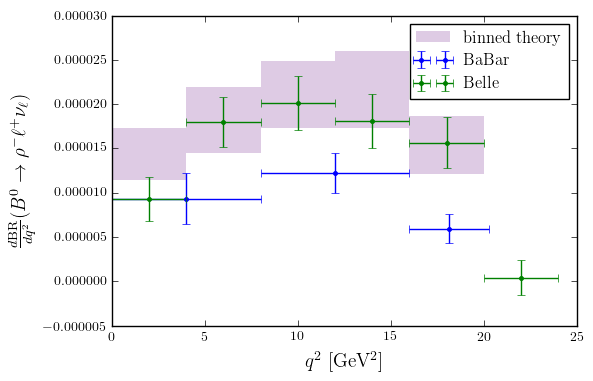

In [47]:
bin_list = [(q2, q2+4) for q2 in range(0, 20, 4)]
flavio.plots.q2_plot_th_bin('<BR>(B0->rholnu)', bin_list=bin_list, divide_binwidth=True, label='binned theory')
flavio.plots.q2_plot_exp('<BR>(B0->rholnu)', divide_binwidth=True)
plt.xlabel(r'$q^2$ [GeV$^2$]')
plt.ylabel(flavio.Observable.get_instance('dBR/dq2(B0->rholnu)').tex)
plt.legend()